In [1]:
import matplotlib.pyplot as plt
import numpy as np
from WooferConfig import WOOFER_CONFIG
import quaternion
%matplotlib notebook
plt.rcParams['figure.figsize'] = (14,8)

In [2]:
data = np.load('woofer_numpy_log.npz')
est = np.load('woofer_state_est_log.npz')['arr_0']

n = np.shape(est)[1]

n_data = np.shape(data['state_history'])[1]

In [3]:
# fig, (ax1, ax2,ax3) = plt.subplots(nrows=3, sharex=True)
# # x_true = data['state_history'][10:13,:n]
# x_est = est[10:13,:]
# # x_est = est[3:7,:]

# l1 = ax1.plot(x_true.T)
# ax1.set_title('Estimated Rate')
# ax1.legend(('x', 'y', 'z'))


# # x_sens = data['gyro_history'][0:3,:n]
# x_sens = data['state_history'][10:13,:n]

# l2 = ax2.plot(x_sens.T)
# ax2.set_title('Gyro Rate')
# ax2.legend(('x', 'y', 'z'))


# p_diff = np.abs(x_sens - x_true)
# l3 = ax3.plot(p_diff.T)
# ax3.set_title('Difference')
# ax3.legend(('x', 'y', 'z'))


# rms = np.sqrt(np.mean(np.square(p_diff[0,:])))
# print("x error: ", rms)

# rms = np.sqrt(np.mean(np.square(p_diff[1,:])))
# print("y error: ", rms)

# rms = np.sqrt(np.mean(np.square(p_diff[2,:])))
# print("z error: ", rms)

# fig.set_size_inches(14,12)
# plt.show()

Quaternion error:  0.00041568771850543937


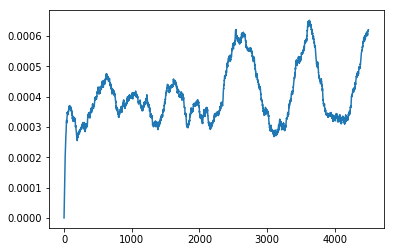

In [4]:
# find the quaternion error
phi = np.zeros(n)

rms = 0
for i in range(n):
    q_i_est = est[3:7,i]
    q_i_true = data['state_history'][3:7,i]
    
    q_d = quaternion.prod(quaternion.inv(q_i_est), q_i_true)
    phi_i = np.linalg.norm(quaternion.log(q_d))
    phi[i] = np.abs((phi_i + np.pi) % (2 * np.pi) - np.pi)

rms = np.sqrt(np.mean(np.square(phi)))
print("Quaternion error: ", rms)
fig, ax = plt.subplots()

line1, = ax.plot(phi)

plt.show()
    

x error:  0.00253409034106695
y error:  0.008325816052656214
z error:  0.012863696136300338


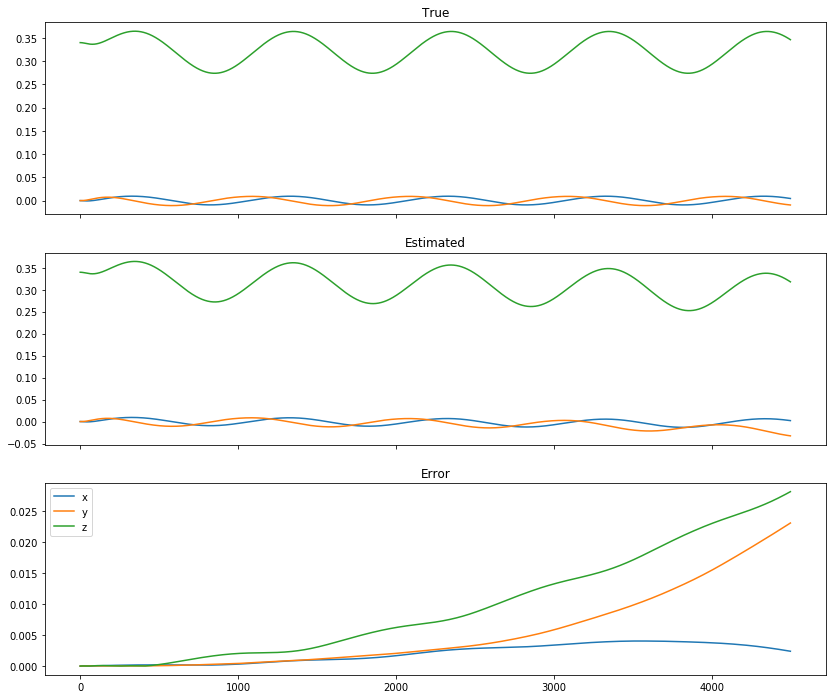

In [5]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=3, sharex=True)
x_true = data['state_history'][0:3,:n]
l1 = ax1.plot(x_true.T)
ax1.set_title('True')

x_est = est[0:3,:]

l2 = ax2.plot(x_est.T)
ax2.set_title('Estimated')

p_diff = np.abs(x_est - x_true)
l3 = ax3.plot(p_diff.T)
ax3.set_title('Error')


rms = np.sqrt(np.mean(np.square(p_diff[0,:])))
print("x error: ", rms)

rms = np.sqrt(np.mean(np.square(p_diff[1,:])))
print("y error: ", rms)

rms = np.sqrt(np.mean(np.square(p_diff[2,:])))
print("z error: ", rms)

fig.set_size_inches(14,12)
# plt.legend(('x','y','z','q0','q1','q2','q3','vx','vy', 'vz', 'wx_b', 'wy_b', 'wz_b'))
plt.legend(('x', 'y', 'z'))
plt.show()


x error:  0.0015917531446060145
y error:  0.007211722272018447
z error:  0.007379582889415986


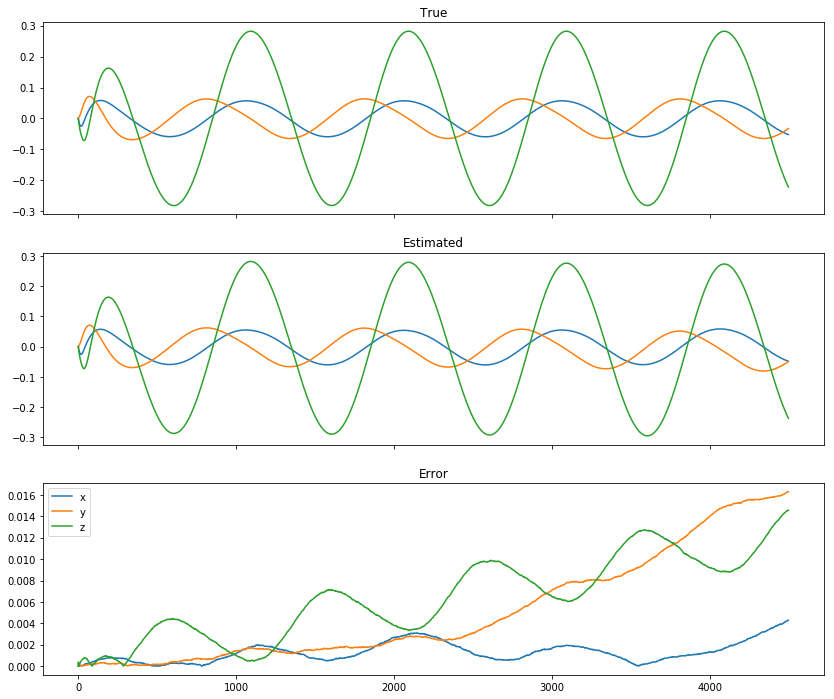

In [6]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=3, sharex=True)
x_true = data['state_history'][7:10,:n]
l1 = ax1.plot(x_true.T)
ax1.set_title('True')

x_est = est[7:10,:]

l2 = ax2.plot(x_est.T)
ax2.set_title('Estimated')

p_diff = np.abs(x_est - x_true)
l3 = ax3.plot(p_diff.T)
ax3.set_title('Error')

rms = np.sqrt(np.mean(np.square(p_diff[0,:])))
print("x error: ", rms)

rms = np.sqrt(np.mean(np.square(p_diff[1,:])))
print("y error: ", rms)

rms = np.sqrt(np.mean(np.square(p_diff[2,:])))
print("z error: ", rms)

fig.set_size_inches(14,12)
# plt.legend(('x','y','z','q0','q1','q2','q3','vx','vy', 'vz', 'wx_b', 'wy_b', 'wz_b'))
plt.legend(('x', 'y', 'z'))
plt.show()
